In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Read xls File and Load to a dataframe

df = pd.read_excel('Hclean_weather2015_2020.xlsx')
df = df.drop(columns = df.columns[14:])
df

,Unnamed: 0.1,Unnamed: 0,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
0,4681,4681,Hemlock,2015-04-08 12:30:00,2015-04-08,12:30:00,1023.15,4.792,72.8,0.3,0.0,0.00,242.9,0.74
1,4682,4682,Hemlock,2015-04-08 13:00:00,2015-04-08,13:00:00,1023.05,4.454,76.2,0.6,0.0,0.00,5.6,0.56
2,4683,4683,Hemlock,2015-04-08 13:30:00,2015-04-08,13:30:00,1022.65,3.985,80.6,1.0,0.0,0.19,33.7,0.74
3,4684,4684,Hemlock,2015-04-08 14:00:00,2015-04-08,14:00:00,1022.65,3.827,87.6,2.0,0.0,0.00,51.9,0.74
4,4685,4685,Hemlock,2015-04-08 14:30:00,2015-04-08,14:30:00,1022.35,3.591,89.7,2.1,0.0,0.00,22.5,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83237,96977,9329,Hemlock,2020-07-13 08:30:00,2020-07-13,08:30:00,1001.95,23.088,87.8,21.0,0.0,0.00,95.5,0.00
83238,96978,9330,Hemlock,2020-07-13 09:00:00,2020-07-13,09:00:00,1001.85,23.545,83.8,20.7,0.0,0.00,95.5,0.56
83239,96979,9331,Hemlock,2020-07-13 09:30:00,2020-07-13,09:30:00,1001.75,24.436,82.3,21.2,0.0,0.00,95.5,0.37
83240,96980,9332,Hemlock,2020-07-13 10:00:00,2020-07-13,10:00:00,1001.85,25.137,79.2,21.3,0.0,0.00,96.9,0.56


In [3]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)

#df['Barometric Pressure (mbar)'] = df['Barometric Pressure (mbar)'].astype(str)

In [4]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2016

,Unnamed: 0.1,Unnamed: 0,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
12847,20400,2880,Hemlock,2016-03-01 00:00:00,2016-03-01,00:00:00,1002.95,4.454,78.1,1.0,0.0,0.19,220.4,2.04
12848,20401,2881,Hemlock,2016-03-01 00:30:00,2016-03-01,00:30:00,1003.35,4.973,73.8,0.7,0.0,0.37,196.5,1.11
12849,20402,2882,Hemlock,2016-03-01 01:00:00,2016-03-01,01:00:00,1004.25,5.128,68.7,-0.1,0.0,0.19,185.3,1.11
12850,20403,2883,Hemlock,2016-03-01 01:30:00,2016-03-01,01:30:00,1006.35,5.719,62.8,-0.8,0.0,2.04,297.6,6.68
12851,20404,2884,Hemlock,2016-03-01 02:00:00,2016-03-01,02:00:00,1007.85,3.906,62.2,-2.7,0.0,2.23,275.2,7.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15439,23323,5803,Hemlock,2016-04-30 21:30:00,2016-04-30,21:30:00,1017.55,9.879,60.4,2.6,0.0,0.19,85.6,0.93
15440,23324,5804,Hemlock,2016-04-30 22:00:00,2016-04-30,22:00:00,1017.75,9.632,61.0,2.5,0.0,0.19,64.6,1.11
15441,23325,5805,Hemlock,2016-04-30 22:30:00,2016-04-30,22:30:00,1017.85,9.064,60.9,1.9,0.0,0.00,162.9,0.74
15442,23326,5806,Hemlock,2016-04-30 23:00:00,2016-04-30,23:00:00,1018.05,8.891,61.7,1.9,0.0,0.00,158.6,0.74


### Case 1 - 'Data'

0.12192301678020234
43.654760998891746


,Unnamed: 0.1,Unnamed: 0,Station,Timestamp,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
47,4728,4728,Hemlock,2015-04-09 12:00:00,2015-04-09,12:00:00,1021.95,1.859,96.0,1.3,0.25,0.00,51.9,0.56
95,4776,4776,Hemlock,2015-04-10 12:00:00,2015-04-10,12:00:00,1005.05,5.488,100.0,5.5,0.00,0.19,273.8,0.56
143,4824,4824,Hemlock,2015-04-11 12:00:00,2015-04-11,12:00:00,1007.15,9.509,52.2,0.2,0.00,2.41,293.4,5.75
191,4872,4872,Hemlock,2015-04-12 12:00:00,2015-04-12,12:00:00,1018.05,16.034,37.4,1.5,0.00,0.93,266.7,2.60
239,4920,4920,Hemlock,2015-04-13 12:00:00,2015-04-13,12:00:00,1018.55,18.652,39.7,4.7,0.00,0.93,271.0,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49462,58152,5544,Hemlock,2018-04-26 12:00:00,2018-04-26,12:00:00,998.25,15.891,61.5,8.5,0.00,1.48,290.6,3.90
49510,58200,5592,Hemlock,2018-04-27 12:00:00,2018-04-27,12:00:00,1004.05,12.847,72.1,8.0,0.00,0.19,300.4,0.93
49558,58248,5640,Hemlock,2018-04-28 12:00:00,2018-04-28,12:00:00,1002.75,18.057,68.6,12.2,0.00,0.56,268.1,2.04
49606,58296,5688,Hemlock,2018-04-29 12:00:00,2018-04-29,12:00:00,1005.55,7.066,96.4,6.5,0.25,0.56,300.4,1.86


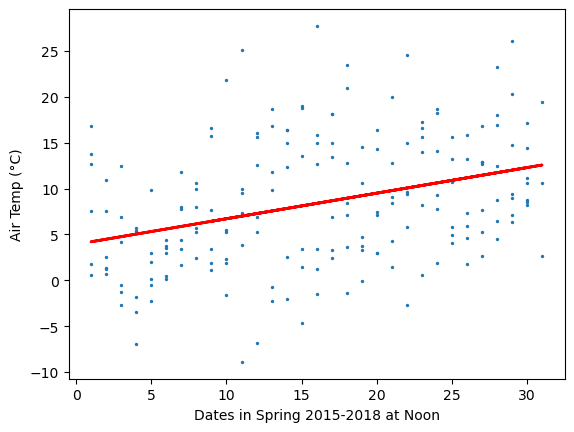

In [5]:
#Separate specific time
#df2015_2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-0-01", "2019-12-31")])]
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

#change dates to remove year
#print(df15_19_noon)

#Plot dates by temps for 2015-2018
date15_18_noon = df15_18_noon['Date']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

#print(date15_18_noon)
date15_18_noon = date15_18_noon.astype(str)
date15_18_noon = date15_18_noon.str.split("-").str[-1].astype(int)

date15_18_noon = date15_18_noon.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_18_noon,temp15_18_noon)
temp15_18_noon_pred = model.predict(date15_18_noon)

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

#draw scatter plot
plt.scatter(date15_18_noon,temp15_18_noon, s=2)
plt.plot(date15_18_noon, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in Spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")
df15_18_noon

0.2619588939788361
35.963131268546725


Text(0, 0.5, 'Air Temp (°C)')

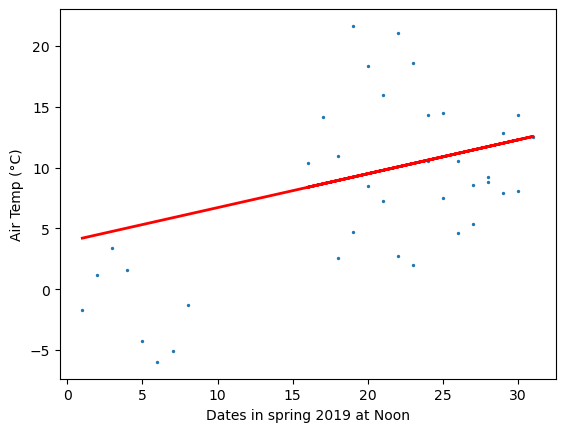

In [6]:
##Plot dates by temps for 2019
df19 =pd.concat([df2019])
df19_noon = df19[df19["Time"]== '12:00:00']
date19_noon = df19_noon['Date']
temp19_noon = df19_noon['Air Temp (°C)']

date19_noon = date19_noon.astype(str)
date19_noon = date19_noon.str.split("-").str[-1].astype(int)

# convert to 2-D array
date19_noon = date19_noon.to_numpy().reshape(-1,1)
temp19_noon = temp19_noon.to_numpy().reshape(-1,1)

# predict 2020 air temperature at noon
temp19_noon_pred = model.predict(date19_noon)

MSE= mean_squared_error(temp19_noon, temp19_noon_pred)
R2= r2_score(temp19_noon, temp19_noon_pred)

print (R2)
print (MSE)

# draw scatter plot
plt.scatter(date19_noon,temp19_noon, s=2)
plt.plot(date19_noon, temp19_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")


### Case 2 - 'Barometric Pressure (mbar)'

0.0013983167581744782
49.64680620047712


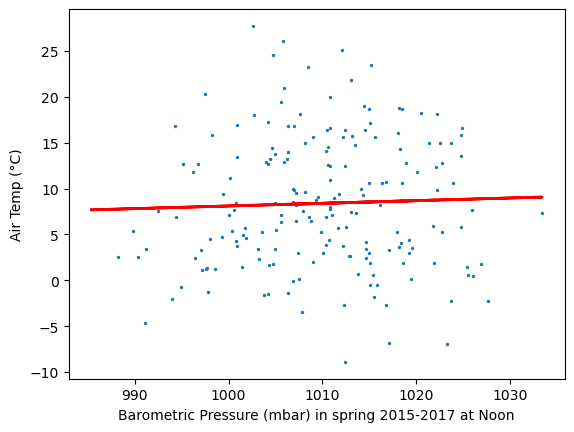

In [7]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

pressure15_18 = df15_18_noon[['Barometric Pressure (mbar)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']


# convert to 2-D array
pressure15_18 = pressure15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pressure15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pressure15_18)

plt.scatter(pressure15_18,temp15_18_noon, s=2)
plt.plot(pressure15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

-0.02028646090794517
49.7163310089414


(array([ 980.,  990., 1000., 1010., 1020., 1030.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

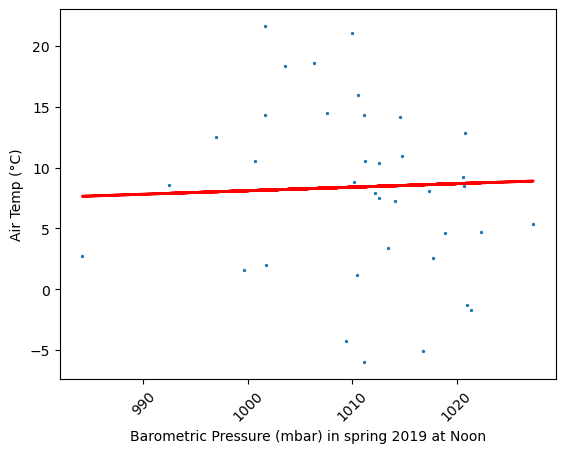

In [8]:
#df20_19 =pd.concat([df2019])
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon['Barometric Pressure (mbar)']
temp2019_noon = df2019_noon['Air Temp (°C)']

pre2019_noon = pre2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2019_noon, temp2019_noon, s = 2)
plt.plot(pre2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 3 - Gust Speed and air temp


0.011987584488726166
49.12034672054016


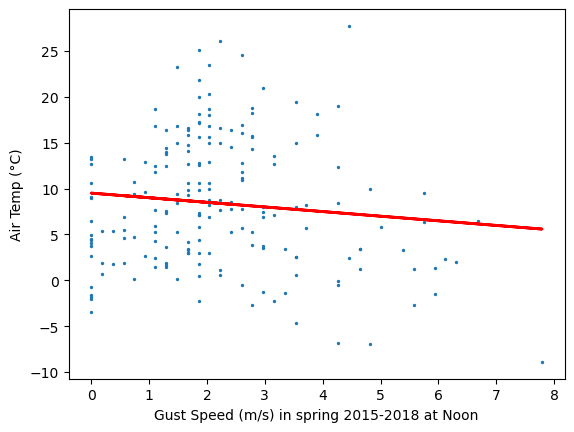

In [9]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

gSpeed15_18 = df15_18_noon[['Gust Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']


# convert to 2-D array
gSpeed15_18 = gSpeed15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(gSpeed15_18)

plt.scatter(gSpeed15_18,temp15_18_noon, s=2)
plt.plot(gSpeed15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

0.04256334417658769
46.65379726655549


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

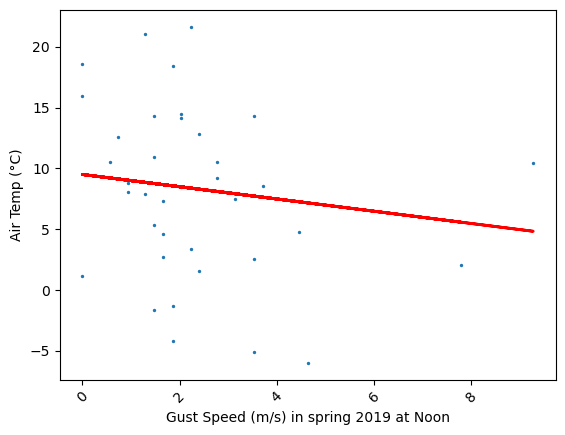

In [10]:
#df20_19 =pd.concat([df2019])
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon['Gust Speed (m/s)']
temp2019_noon = df2019_noon['Air Temp (°C)']

pre2019_noon = pre2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2019_noon, temp2019_noon, s = 2)
plt.plot(pre2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 4 - Barometric Pressure (mbar),Gust Speed (m/s) and Air Temp

In [11]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

pre15_18 = df15_18_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre15_18 = pre15_18.to_numpy().reshape(-1,2)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)



0.012816546433150444
49.079133778790656


In [12]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019])
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2019_noon = pre2019_noon.to_numpy().reshape(-1,2)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
# plt.scatter(pre2020_noon, temp2020_noon, s = 2)
# plt.xlabel("Barometric Pressure (mbar) in spring 2020 at Noon")
# plt.ylabel("Air Temp (°C)")
# plt.xticks(rotation=45)


0.028728099838838395
47.32795850797099


### Case 5 - Wind Speed (m/s)

0.0024845810831540804
49.592801129857094


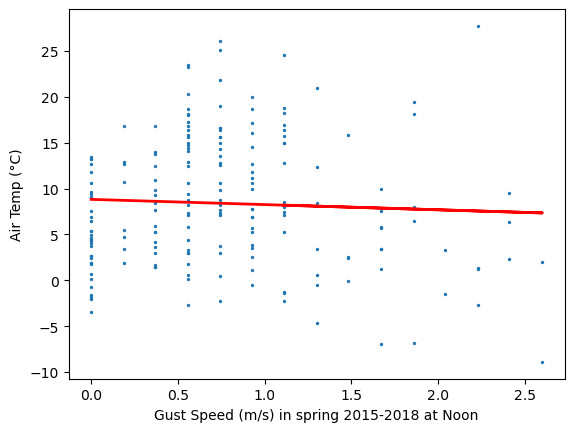

In [13]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

gSpeed15_18 = df15_18_noon[['Wind Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']


# convert to 2-D array
gSpeed15_18 = gSpeed15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(gSpeed15_18)

plt.scatter(gSpeed15_18,temp15_18_noon, s=2)
plt.plot(gSpeed15_18, temp15_18_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2018 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

0.008720429253525008
48.30288860030224


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

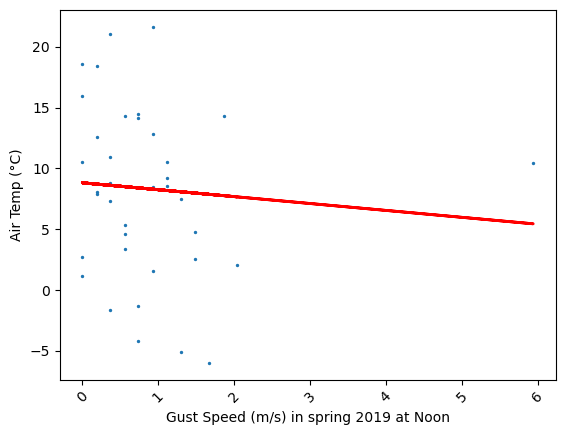

In [14]:
#df20_19 =pd.concat([df2019])
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon['Wind Speed (m/s)']
temp2019_noon = df2019_noon['Air Temp (°C)']

pre2019_noon = pre2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2019_noon, temp2019_noon, s = 2)
plt.plot(pre2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 7 - 'Wind Speed (m/s)','Barometric Pressure (mbar)'

In [15]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

pre15_18 = df15_18_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre15_18 = pre15_18.to_numpy().reshape(-1,2)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


0.0036225545602645015
49.53622527020505


In [16]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019])
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon[['Barometric Pressure (mbar)','Wind Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2019_noon = pre2019_noon.to_numpy().reshape(-1,2)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

-0.006730851915847769
49.055795787216354


### Case 8
##### x: 'Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)'\n
##### y: 'Air Temp (°C)'

In [17]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

pre15_18 = df15_18_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre15_18 = pre15_18.to_numpy().reshape(-1,3)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


0.039528377222691646
47.75111970799208


In [18]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019])
df2019_noon = df2019[df2019["Time"]== '12:00:00']
pre2019_noon = df2019_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2019_noon = pre2019_noon.to_numpy().reshape(-1,3)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

0.009983804987547251
48.241327059903654


### Case 6
##### x: 'RH (%)'
##### y: 'Air Temp (°C)'

In [19]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

pre15_18 = df15_18_noon['RH (%)']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
pre15_18 = pre15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(pre15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)


0.04587081900723222
47.43579680858271


-32.953421600571495
1654.4760828032354


(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

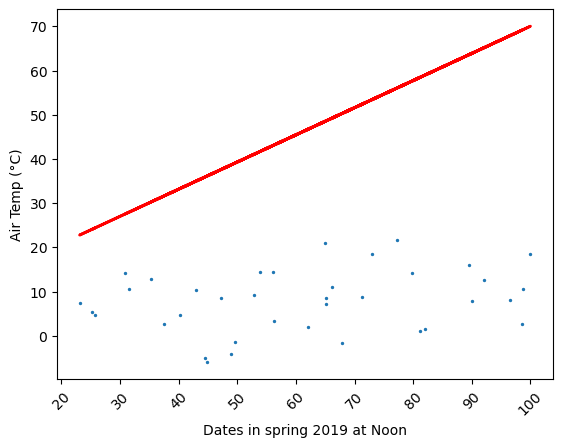

In [26]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2019_noon = df20_19[df20_19["Time"]== '12:00:00']
pre2019_noon = df2019_noon['RH (%)']
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2019_noon = pre2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(pre2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

plt.scatter(pre2019_noon, temp2019_noon, s = 2)
plt.plot(pre2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 7 -Dew Point (°C)

0.4581635281584676
26.93811833216439


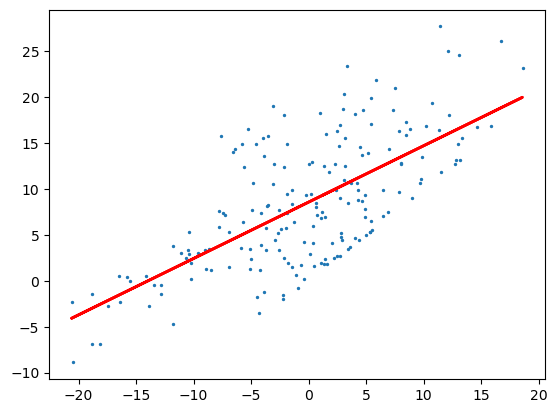

In [27]:
# plot linear regression
df2015_2018 = pd.concat([df2015,df2016,df2017,df2018])
df15_18_noon = df2015_2018[df2015_2018["Time"]== '12:00:00']

dp15_18 = df15_18_noon['Dew Point (°C)']
temp15_18_noon = df15_18_noon['Air Temp (°C)']

# convert to 2-D array
dp15_18 = dp15_18.to_numpy().reshape(-1,1)
temp15_18_noon = temp15_18_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(dp15_18,temp15_18_noon)
temp15_18_noon_pred = model.predict(dp15_18)


MSE= mean_squared_error(temp15_18_noon, temp15_18_noon_pred)
R2= r2_score(temp15_18_noon, temp15_18_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp15_18, temp15_18_noon, s = 2)
plt.plot(dp15_18, temp15_18_noon_pred, color='red', linewidth=2)

0.6681283315745108
16.17138161889215


(array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

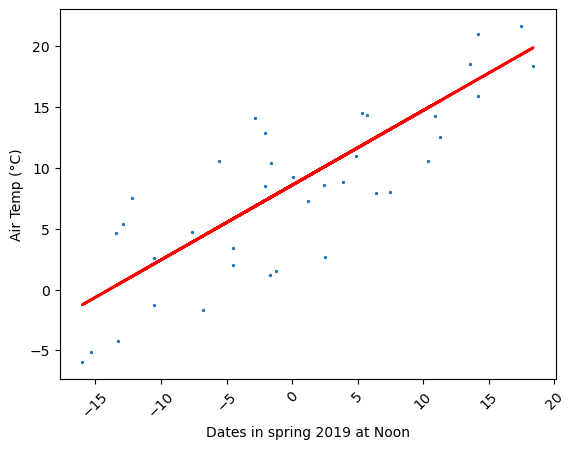

In [29]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2019])
df2019_noon = df20_19[df20_19["Time"]== '12:00:00']
dp2019_noon = df2019_noon['Dew Point (°C)']
temp2019_noon = df2019_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
dp2019_noon = dp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon = temp2019_noon.to_numpy().reshape(-1,1)
temp2019_noon_pred = model.predict(dp2019_noon)

MSE= mean_squared_error(temp2019_noon, temp2019_noon_pred)
R2= r2_score(temp2019_noon, temp2019_noon_pred)

print (R2)
print (MSE)

plt.scatter(dp2019_noon, temp2019_noon, s = 2)
plt.plot(dp2019_noon, temp2019_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring 2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)